<a href="https://colab.research.google.com/github/RDGopal/IB9LQ0-GenAI/blob/main/Reinforcement_Learning_Illustration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Reinforcement Learning (RL)

RL is a type of machine learning where an agent learns to make decisions by interacting with an environment to maximize a cumulative reward. Unlike supervised learning (predicting labels from data) or unsupervised learning (finding patterns), RL involves trial-and-error learning based on feedback (rewards or penalties).

**Key Components:**
* Agent: The decision-maker (e.g., a robot or game character).
* Environment: The world the agent operates in (e.g., a game or maze).
* State: The current situation of the agent (e.g., its position in a maze).
* Action: Choices the agent can make (e.g., move up, down, left, right).
* Reward: Feedback from the environment (e.g., +10 for reaching a goal, -1 for each step).
* Policy: The strategy the agent develops to choose actions based on states.


**Intuition:**

Imagine training a dog: it learns by receiving treats (rewards) for good actions and no treats (or scolding) for bad ones. Over time, it figures out the best behaviors to maximize treats. RL works similarly, with the agent learning from experience.

#Maze Example

Problem Setup:
Consider a 3x3 grid maze:
$$
	\begin{bmatrix}
	0 & 0 & 0 \\
	0 & 1 & 0\\
	0 & 0 & 2 \\
	\end{bmatrix}
	\quad
	$$

where

**0**: Open path

**1**: Wall (impassable)

**2**: Goal

The agent starts at (0,0) and aims to reach (2,2).

Mapping to RL:
* State: The agent’s (x, y) position (e.g., (0,0)).
* Actions: Move up, down, left, or right.
* Rewards: -1 per step (to encourage efficiency), +10 for reaching the goal.
* Environment: The maze grid, enforcing rules (e.g., can’t pass through walls).
* Agent’s Goal: Learn a policy to reach (2,2) with the highest cumulative reward.

**Intuition:**
The agent explores the maze, initially moving randomly. Over time, it learns which paths lead to the goal faster by associating actions with rewards.

#Q-Learning Algorithm

Q-learning is a model-free RL algorithm where the agent builds a Q-table to estimate the value (quality) of taking an action in a given state. The goal is to learn an optimal policy without needing a model of the environment.

**Key Concepts:**
* Q-Table: A table storing Q-values, Q(s, a), for each state-action pair. For our 3x3 maze with 4 actions, it’s a 3x3x4 array.
* Q-Update Rule:

$$Q(s, a) ← Q(s, a) + α [r + γ * max(Q(s', a')) - Q(s, a)]$$

s: Current state \
a: Action taken\
r: Reward received\
s': Next state\
α (alpha): Learning rate (e.g., 0.1)\
γ (gamma): Discount factor (e.g., 0.9)

Updates Q-values based on immediate reward and future expected reward.

**Epsilon-Greedy Strategy:**\
Balances exploration (random actions) and exploitation (best-known actions). With probability ε (e.g., 0.1), choose a random action; otherwise, pick the action with the highest Q-value.

Logic:\
The agent starts with a blank Q-table (all zeros). As it explores, it updates Q-values based on rewards. Over many trials, the Q-table converges to reflect the best actions, forming an optimal policy.


#A Concrete Example

 Q-value updating process with two steps from the initial state are shown below.

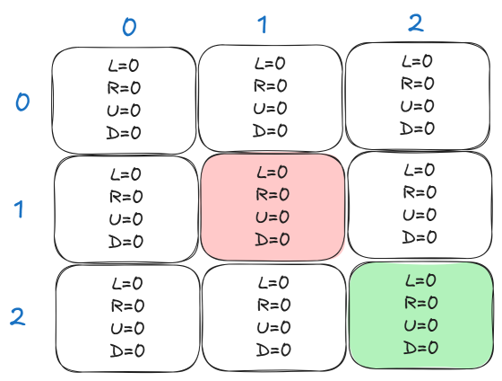



##Step 1: Initial Exploration

1. **Initialization**: The Q-table starts with all values set to 0. The agent is at the start state (0, 0).
2. **Action Selection**: Using the epsilon-greedy strategy, the agent selects an action. Let's say it randomly chooses to move 'Right' (action index 2).
3. **Taking the Step**: The agent moves to the new state (0, 1) and receives a reward of -1 (as it's a regular step). The done flag is False as it hasn't reached the goal.
* **Q-value Update**: Now, the Q-value for the state-action pair (0, 0), Right is updated using the Q-learning update rule:
$$
Q(s, a) ← Q(s, a) + α [r + γ * max(Q(s', a')) - Q(s, a)]$$

Where:

s: Current state (0, 0)

a: Action taken Right

r: Reward received -1

s': Next state (0, 1)

α: Learning rate (e.g., 0.1)

γ: Discount factor (e.g., 0.9)

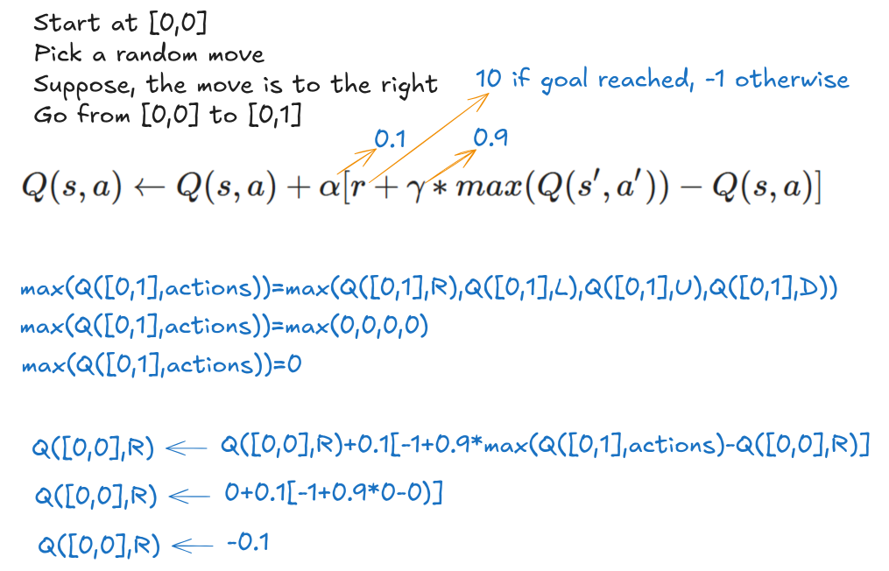


Since the Q-table was initialized with 0s, max(Q(s', a')) is 0 (the maximum Q-value for all actions in the next state (0, 1)).

So the update becomes:

**Q((0, 0), Right)** ← 0 + 0.1 [-1 + 0.9 * 0 - 0]

**Q((0, 0), Right)** ← -0.1


The Q-value for moving Right from state (0, 0) is now -0.1. This reflects the negative reward received for that step.

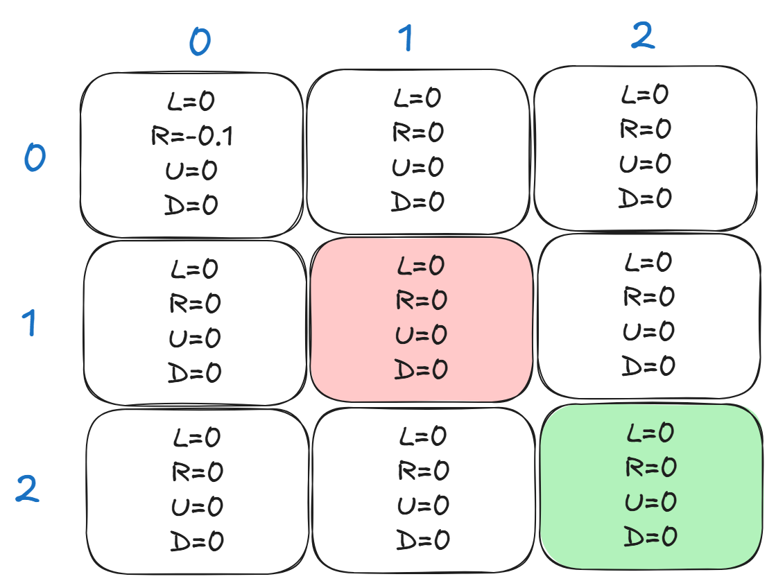

##Step 2: Continuing the Exploration

1. **Current State**: The agent is now in state (0, 1).
2. **Action Selection**: Again, using epsilon-greedy, let's say the agent chooses to move 'Down' (action index 1).
3. **Taking the Step**: The agent attempts to move to state (1, 1) but hits a wall (as defined in the grid). Therefore, it stays in the same state (0, 1) and receives a reward of -1. The done flag remains False.
4. **Q-value Update**: The Q-value for the state-action pair (0, 1), Down is updated:
$$
Q((0, 1), Down) ← Q((0, 1), Down) + α [r + γ * max(Q(s', a')) - Q((0, 1), Down)]
$$

Here, s' is still (0, 1) (as the agent didn't move), and max(Q(s', a')) is likely still 0 or a small negative value depending on previous updates.

Assuming max(Q(s', a')) is 0, the update becomes:


**Q((0, 1), Down)** ← 0 + 0.1 [-1 + 0.9 * 0 - 0]

**Q((0, 1), Down)** ← -0.1


The Q-value for moving Down from state (0, 1) is now -0.1. This again reflects the negative reward.

**In summary**: The Q-values are updated iteratively based on the rewards received and the estimated future rewards (represented by max(Q(s', a'))). Over many episodes and explorations, the Q-values converge to reflect the optimal actions to take in each state, allowing the agent to learn the best path to the goal.

In [ ]:
import numpy as np

#Maze Environment

In [ ]:
class Maze:
    def __init__(self):
        self.grid = [[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 2]]  # 0: open, 1: wall, 2: goal
        self.start = (0, 0)
        self.goal = (2, 2)
        self.state = self.start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right
        new_state = (self.state[0] + moves[action][0], self.state[1] + moves[action][1])

        # Check boundaries and walls
        if (new_state[0] < 0 or new_state[0] >= 3 or
            new_state[1] < 0 or new_state[1] >= 3 or
            self.grid[new_state[0]][new_state[1]] == 1):
            new_state = self.state  # Stay if invalid move

        reward = -1
        done = False
        if new_state == self.goal:
            reward = 10
            done = True

        self.state = new_state
        return new_state, reward, done

#Q-Learning Setup

In [ ]:
# Initialize Q-table
q_table = np.zeros((3, 3, 4))  # 3x3 states, 4 actions

# Epsilon-greedy action selection
def epsilon_greedy(state, q_table, epsilon=0.1):
    if np.random.rand() < epsilon:
        return np.random.randint(4)
    else:
        return np.argmax(q_table[state[0], state[1]])

#Training

In [ ]:
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
maze = Maze()

for episode in range(1000):
    state = maze.reset()
    done = False
    while not done:
        action = epsilon_greedy(state, q_table)
        new_state, reward, done = maze.step(action)

        # Q-update
        q_table[state[0], state[1], action] += alpha * (
            reward + gamma * np.max(q_table[new_state[0], new_state[1]]) - q_table[state[0], state[1], action]
        )
        state = new_state

In [ ]:
print(q_table[0,0])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your Q-table is named 'q_table'

actions = ['Up', 'Down', 'Left', 'Right']  # Action labels

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid for 4 actions

# Iterate through actions and plot heatmaps
for i, action in enumerate(actions):
    row = i // 2  # Calculate subplot row index
    col = i % 2   # Calculate subplot column index
    ax = axes[row, col]  # Get the current subplot

    # Create a heatmap using Seaborn
    sns.heatmap(q_table[:, :, i], annot=True, cmap='viridis', ax=ax)

    # Set subplot title and labels
    ax.set_title(f'Action: {action}')
    ax.set_xlabel('State Column')
    ax.set_ylabel('State Row')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#Testing

In [ ]:
state = maze.reset()
path = [state]
done = False
while not done:
    action = np.argmax(q_table[state[0], state[1]])  # Greedy policy
    state, _, done = maze.step(action)
    path.append(state)

print("Learned Path:", path)

#Expanded Setup

#Define and Display the Maze

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Maze Environment
class Maze:
    def __init__(self, grid, start, goal):
        """Initialize the maze with a grid, start position, and goal position."""
        self.grid = np.array(grid)  # Convert to NumPy array for plotting
        self.start = start
        self.goal = goal
        self.state = start
        self.rows, self.cols = self.grid.shape
        # Validate start and goal positions
        assert 0 <= start[0] < self.rows and 0 <= start[1] < self.cols, "Start position out of bounds"
        assert 0 <= goal[0] < self.rows and 0 <= goal[1] < self.cols, "Goal position out of bounds"
        assert self.grid[start[0], start[1]] == 0, "Start position must be an open cell (0)"
        assert self.grid[goal[0], goal[1]] == 2, "Goal position must be marked as 2"

    def reset(self):
        """Reset the agent to the start position."""
        self.state = self.start
        return self.state

    def step(self, action):
        """Take a step in the maze based on the action."""
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right
        new_state = (self.state[0] + moves[action][0], self.state[1] + moves[action][1])
        if (new_state[0] < 0 or new_state[0] >= self.rows or
            new_state[1] < 0 or new_state[1] >= self.cols or
            self.grid[new_state[0], new_state[1]] == 1):
            new_state = self.state
        reward = -1
        done = False
        if new_state == self.goal:
            reward = 10
            done = True
        self.state = new_state
        return new_state, reward, done

# Define your maze (user can modify this)
grid = [
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 1, 2, 0, 0]
]
start = (0, 0)
goal = (3, 2)

# Create the maze
maze = Maze(grid, start, goal)

##Plot the maze

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

# Draw the rectangle
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j] == 0:  # Open path
            color = 'white'
        elif grid[i][j] == 1:  # Wall
            color = 'black'
        elif grid[i][j] == 2:  # Goal
            color = 'yellow'
        rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor='black')  # (x, y), width, height
        ax.add_patch(rect)

# Mark start and goal
plt.text(start[1] + 0.5, start[0] + 0.5, 'S', ha='center', va='center', color='red', fontsize=12)
plt.text(goal[1] + 0.5, goal[0] + 0.5, 'G', ha='center', va='center', color='blue', fontsize=12)

# Set plot limits and labels
ax.set_xlim(0, len(grid[0]))
ax.set_ylim(0, len(grid))
ax.set_xticks(np.arange(len(grid[0])) + 0.5)  # Centered ticks
ax.set_yticks(np.arange(len(grid)) + 0.5)
ax.set_xticklabels([])  # Remove tick labels
ax.set_yticklabels([])
ax.set_aspect('equal')  # Ensure squares are square

# Display the plot
plt.title("4x4 Grid")
plt.show()

#Set Up Q-Learning

In [ ]:
# Q-Learning Setup
q_table = np.zeros((maze.rows, maze.cols, 4))  # Rows × Columns × 4 actions

# Epsilon-Greedy Action Selection
def epsilon_greedy(state, q_table, epsilon=0.1):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(4)  # Explore: random action
    else:
        return np.argmax(q_table[state[0], state[1]])  # Exploit: best action

# Test the setup (optional)
state = maze.reset()
action = epsilon_greedy(state, q_table)
print(f"Starting state: {state}, Chosen action: {action}")

#Train the Agent

In [ ]:
# Training Loop
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
num_episodes = 1000

for episode in range(num_episodes):
    state = maze.reset()
    done = False
    while not done:
        action = epsilon_greedy(state, q_table)
        new_state, reward, done = maze.step(action)
        # Q-update rule
        q_table[state[0], state[1], action] += alpha * (
            reward + gamma * np.max(q_table[new_state[0], new_state[1]]) - q_table[state[0], state[1], action]
        )
        state = new_state

print(f"Training completed after {num_episodes} episodes.")
print("Sample Q-values at start:", q_table[start[0], start[1]])

#Test and Visualize the Learned Policy

In [ ]:
# Testing the Learned Policy
state = maze.reset()
path = [state]
done = False
while not done:
    action = np.argmax(q_table[state[0], state[1]])  # Greedy policy (no exploration)
    state, _, done = maze.step(action)
    path.append(state)

print("Learned Path:", path)

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Draw the rectangle
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j] == 0:  # Open path
            color = 'white'
        elif grid[i][j] == 1:  # Wall
            color = 'black'
        elif grid[i][j] == 2:  # Goal
            color = 'yellow'
        rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor='black')  # (x, y), width, height
        ax.add_patch(rect)

# Mark start and goal
plt.text(start[1] + 0.5, start[0] + 0.5, 'S', ha='center', va='center', color='red', fontsize=12)
plt.text(goal[1] + 0.5, goal[0] + 0.5, 'G', ha='center', va='center', color='blue', fontsize=12)

# Overlay the learned path
for i in range(len(path) - 1):
    x1, y1 = path[i]
    x2, y2 = path[i + 1]
    ax.plot([y1 + 0.5, y2 + 0.5], [x1 + 0.5, x2 + 0.5], color='red', linewidth=2)
    # Plot line between centers of cells

# Set plot limits and labels
ax.set_xlim(0, len(grid[0]))
ax.set_ylim(0, len(grid))
ax.set_xticks(np.arange(len(grid[0])) + 0.5)  # Centered ticks
ax.set_yticks(np.arange(len(grid)) + 0.5)
ax.set_xticklabels([])  # Remove tick labels
ax.set_yticklabels([])
ax.set_aspect('equal')  # Ensure squares are square

# Display the plot
plt.title("4x4 Grid")
plt.show()

#Your Turn
Create another grid and optimize the solution using RL.